In [1]:
import spatialdata as sd
import spatialdata_plot

This notebook illustrates how the performance is improved when rendering images/labels and what to consider when plotting multiscale-images/-labels.

The example dataset can be downloaded [here](https://s3.embl.de/spatialdata/spatialdata-sandbox/visium_associated_xenium_io.zip).

In [2]:
# sdata = sd.read_zarr("visium_associated_xenium_io.zarr")
sdata = sd.read_zarr("D:/hiwi/visium_associated_xenium_io.zarr")
sdata

SpatialData object with:
├── Images
│     ├── 'CytAssist_FFPE_Human_Breast_Cancer_full_image': MultiscaleSpatialImage[cyx] (3, 21571, 19505), (3, 10785, 9752), (3, 5392, 4876), (3, 2696, 2438), (3, 1348, 1219)
│     ├── 'CytAssist_FFPE_Human_Breast_Cancer_hires_image': SpatialImage[cyx] (3, 2000, 1809)
│     ├── 'CytAssist_FFPE_Human_Breast_Cancer_lowres_image': SpatialImage[cyx] (3, 600, 543)
│     └── 'multicale_copy': MultiscaleSpatialImage[cyx] (3, 21571, 19505), (3, 10785, 9752), (3, 5392, 4876), (3, 2696, 2438), (3, 1348, 1219)
├── Shapes
│     └── 'CytAssist_FFPE_Human_Breast_Cancer': GeoDataFrame shape: (4992, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 4992 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial': AnnData (4992, 18085)
with coordinate systems:
▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Human_

# 1 Single-Scale Images

## 1.1 Default Behavior

INFO     Dropping coordinate system 'global' since it doesn't have relevant elements.                              
INFO     Dropping coordinate system 'downscaled_hires' since it doesn't have relevant elements.                    


c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 891 ms
Wall time: 1.6 s


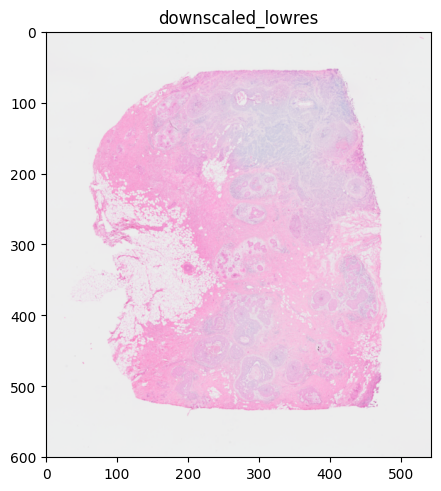

In [3]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_lowres_image").pl.show()

When necessary ("image is too large", heuristic using image size, dpi and extent of the actual image), the image is rasterized to improve performance:

INFO     Dropping coordinate system 'global' since it doesn't have relevant elements.                              
INFO     Dropping coordinate system 'downscaled_lowres' since it doesn't have relevant elements.                   


c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 641 ms
Wall time: 744 ms


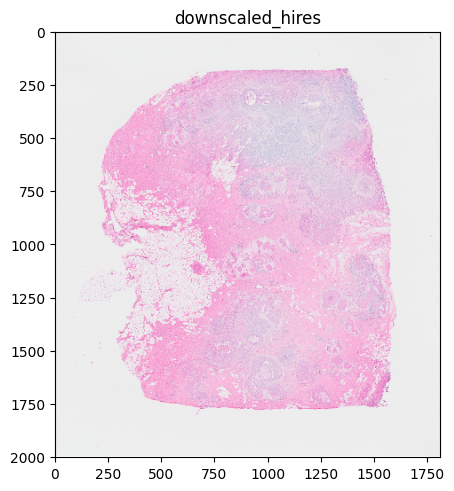

In [4]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_hires_image").pl.show()
# the image is automatically rasterized before rendering

## 1.2 Options

The user can set image size and dpi with the `dpi` and `figisze` parameters of `pl.show()`. These parameters also have an influence on the rasterization!

INFO     Dropping coordinate system 'global' since it doesn't have relevant elements.                              
INFO     Dropping coordinate system 'downscaled_lowres' since it doesn't have relevant elements.                   


c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 859 ms
Wall time: 845 ms


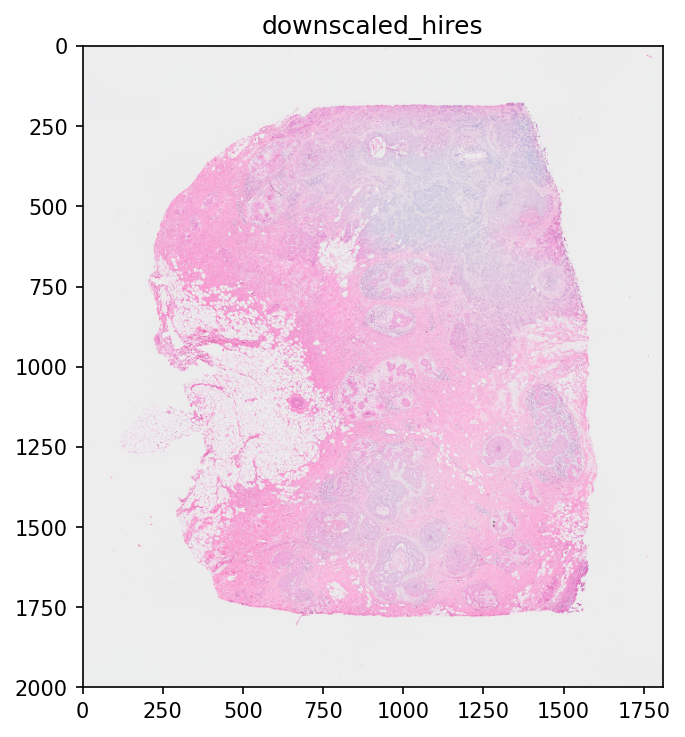

In [5]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_hires_image").pl.show(dpi=150)
# the image is automatically rasterized before rendering

In order to disable the rasterization of an image, one can set `scale="full"` in `pl.render_images()` or `pl.render_labels()`. Note, that depending on the image size, this can lead to long rendering times.

INFO     Dropping coordinate system 'global' since it doesn't have relevant elements.                              
INFO     Dropping coordinate system 'downscaled_lowres' since it doesn't have relevant elements.                   


c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 688 ms
Wall time: 668 ms


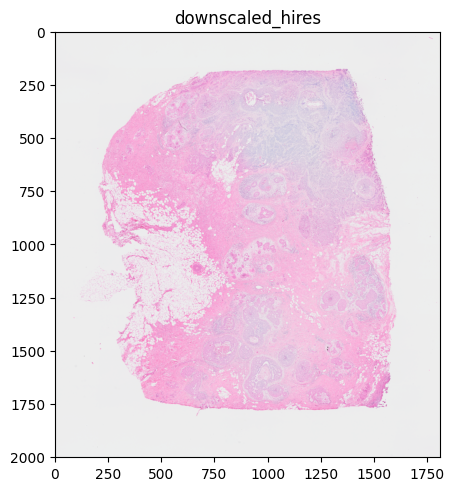

In [6]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_hires_image", scale="full").pl.show()

# 2 Multi-Scale Images

## 2.1 Default Behavior

Per default, the scale that fits the image size best is automatically selected. From there on, the selected scale is treated like a single-scale image (e.g. if necessary, a rasterization step is added to speed up the rendering process).

In the example here: `scale4` (the scale with the lowest resolution) is selected.

c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 578 ms
Wall time: 686 ms


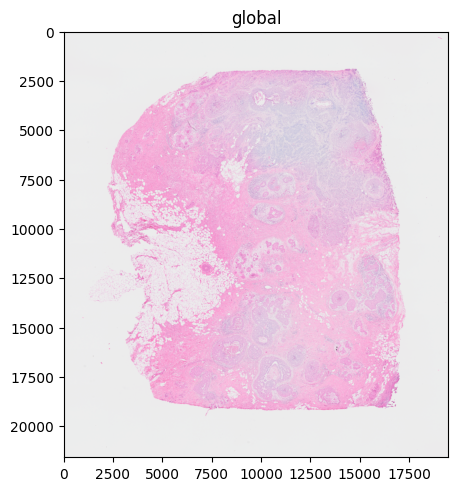

In [7]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_full_image").pl.show("global")
# "scale4" is automatically selected

## 2.2 Options

As always, image size and dpi can be regulated via the `dpi` and `figsize` parameters of `pl.show()`. Those parameters also affect the scale selection!

The example below shows that when choosing a higher `dpi`, a scale with higher resolution is selected automatically (`scale3` in this case). Also, a rasterization step was performed to speed up the performance (just as it would happen with a single-scale image). It is the normal behavior that when the "optimal" scale lies between two existing scales, the one with higher resolution is selected and if necessary, the image is rasterized to speed up the rendering. Else, the resulting resolution could be lower than the "optimal" one.

The same behavior could have been achieved with e.g. `dpi=300`.

c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 4min 22s
Wall time: 39 s


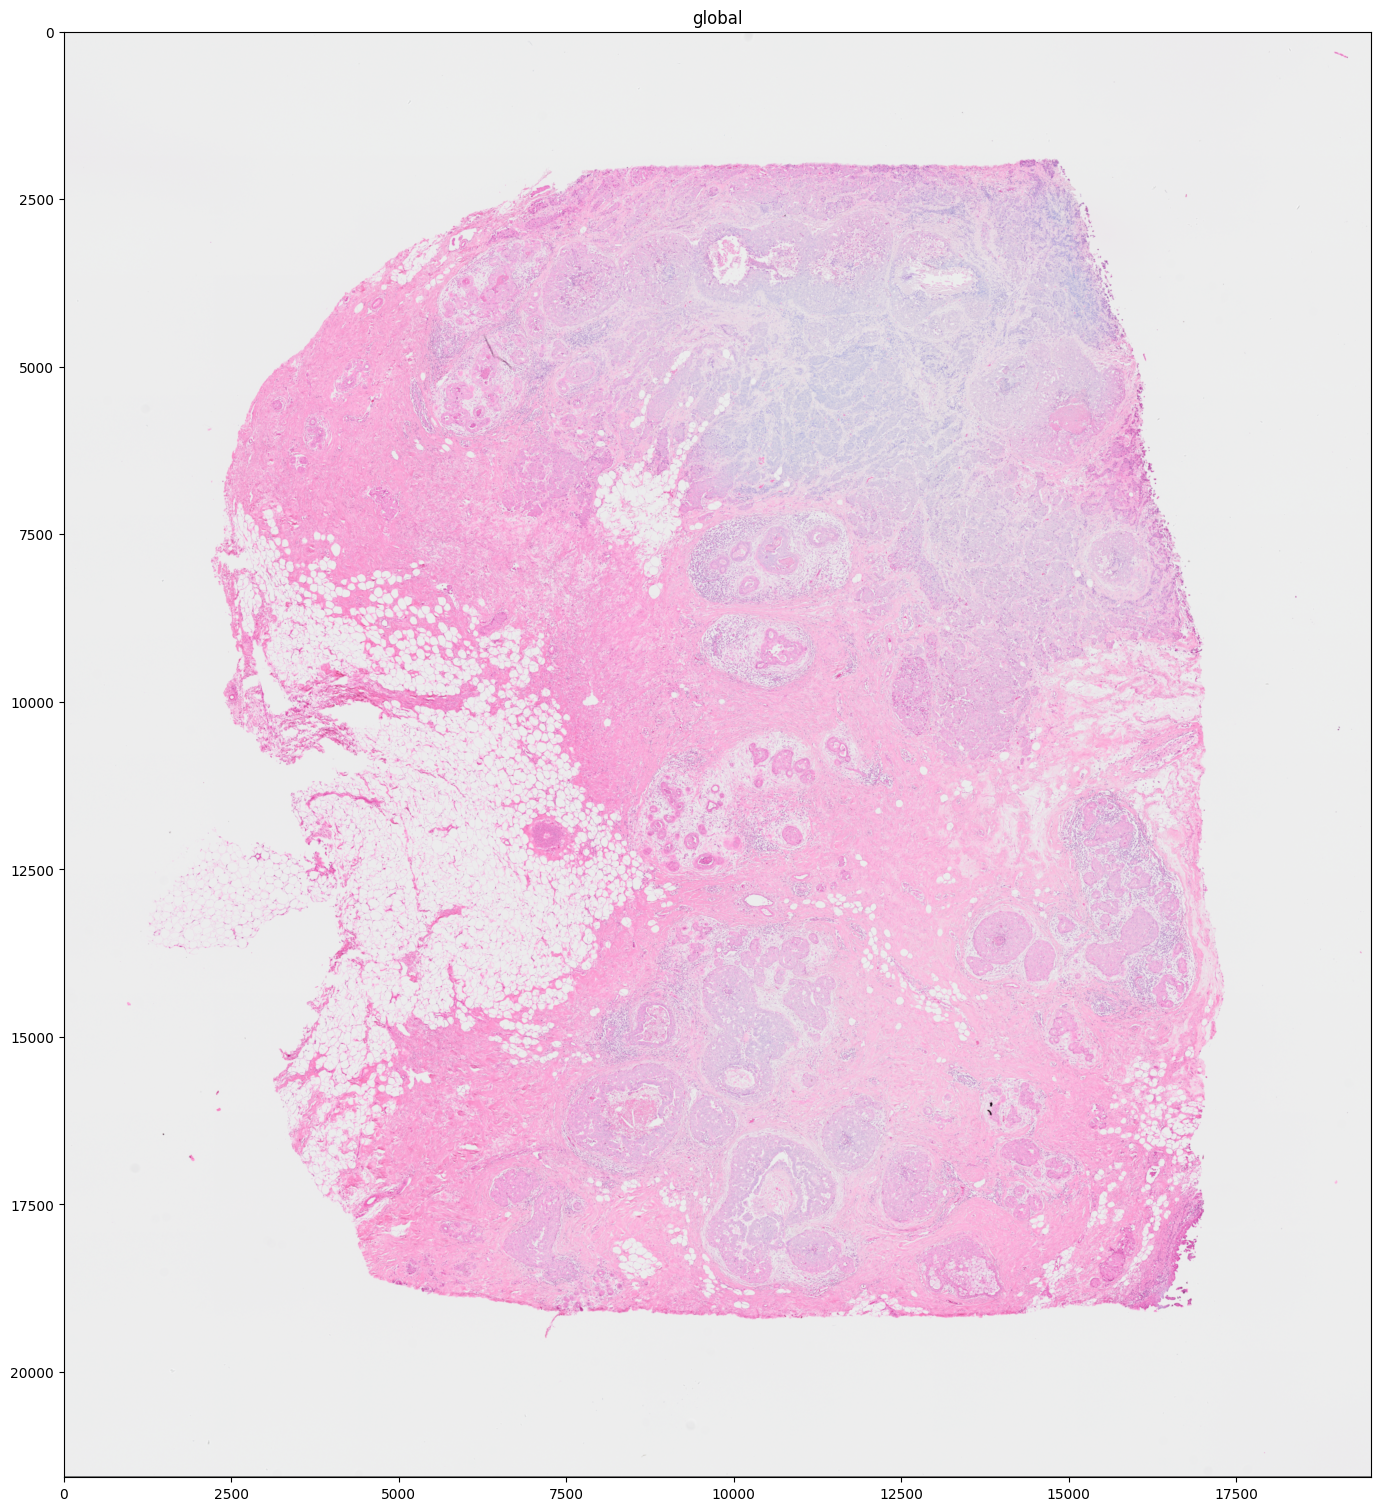

In [8]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_full_image").pl.show("global", figsize=(15.0, 15.0))
# "scale3" is automatically selected and the image is automatically rasterized before rendering

The user can also select a specific scale to be rendered using the `scale` argument of `pl.render_images()` or `pl.render_labels()`.

Note, that when a specific scale is selected, no rasterization will be performed, unless: `dpi` or `figsize` are specified by the user in `pl.show()`. This re-enables the rasterization if neccessary.

c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 875 ms
Wall time: 745 ms


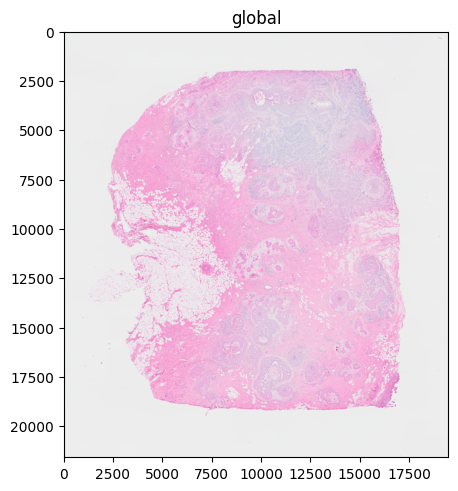

In [9]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_full_image", scale="scale3").pl.show("global")

c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 17.9 s
Wall time: 8.31 s


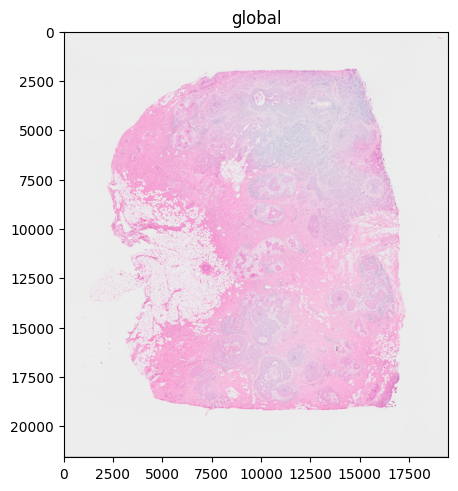

In [10]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_full_image", scale="scale3").pl.show("global", dpi=100)
# the image is automatically rasterized before rendering

Below, you can see an example where the scale with highest resolution was selected but the overall plot should have a `dpi` of 100. This leads to a drastic rasterization and a suboptimal result regarding image quality. This shows why it usually doesn't make much sense to specify scale and dpi/figsize at the same time.

c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 32.4 s
Wall time: 1min 34s


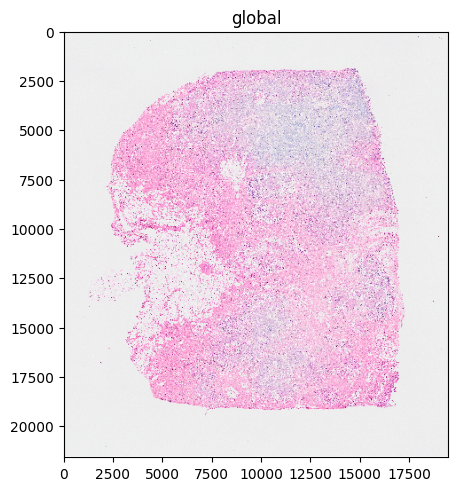

In [11]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_full_image", scale="scale0").pl.show("global", dpi=100)
# the image is automatically rasterized before rendering

Setting `scale="full"` in `pl.render_images()` or `pl.render_labels()` will lead to the scale with highest resolution being selected and no rasterization being performed. Depending on resolution/image size this can lead to long rendering times!

c:\Users\stock\.conda\envs\hiwi3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:
C:\Users\stock\Documents\Uni\hiwi\spatialdata\src\spatialdata\models\models.py:627: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(data[c]) and not data[c].cat.known:


CPU times: total: 36.2 s
Wall time: 29.9 s


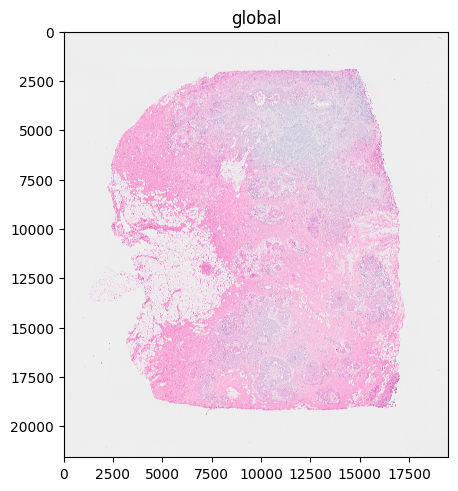

In [12]:
%%time
sdata.pl.render_images("CytAssist_FFPE_Human_Breast_Cancer_full_image", scale="full").pl.show("global")
# "scale0" is used